In [741]:
#invite people for the Kaggle party
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [742]:
#bring in the six packs
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [743]:
#check the decoration
df_train.columns

Index([u'Id', u'MSSubClass', u'MSZoning', u'LotFrontage', u'LotArea',
       u'Street', u'Alley', u'LotShape', u'LandContour', u'Utilities',
       u'LotConfig', u'LandSlope', u'Neighborhood', u'Condition1',
       u'Condition2', u'BldgType', u'HouseStyle', u'OverallQual',
       u'OverallCond', u'YearBuilt', u'YearRemodAdd', u'RoofStyle',
       u'RoofMatl', u'Exterior1st', u'Exterior2nd', u'MasVnrType',
       u'MasVnrArea', u'ExterQual', u'ExterCond', u'Foundation', u'BsmtQual',
       u'BsmtCond', u'BsmtExposure', u'BsmtFinType1', u'BsmtFinSF1',
       u'BsmtFinType2', u'BsmtFinSF2', u'BsmtUnfSF', u'TotalBsmtSF',
       u'Heating', u'HeatingQC', u'CentralAir', u'Electrical', u'1stFlrSF',
       u'2ndFlrSF', u'LowQualFinSF', u'GrLivArea', u'BsmtFullBath',
       u'BsmtHalfBath', u'FullBath', u'HalfBath', u'BedroomAbvGr',
       u'KitchenAbvGr', u'KitchenQual', u'TotRmsAbvGrd', u'Functional',
       u'Fireplaces', u'FireplaceQu', u'GarageType', u'GarageYrBlt',
       u'GarageFinish',

In [744]:
df_test.columns

Index([u'Id', u'MSSubClass', u'MSZoning', u'LotFrontage', u'LotArea',
       u'Street', u'Alley', u'LotShape', u'LandContour', u'Utilities',
       u'LotConfig', u'LandSlope', u'Neighborhood', u'Condition1',
       u'Condition2', u'BldgType', u'HouseStyle', u'OverallQual',
       u'OverallCond', u'YearBuilt', u'YearRemodAdd', u'RoofStyle',
       u'RoofMatl', u'Exterior1st', u'Exterior2nd', u'MasVnrType',
       u'MasVnrArea', u'ExterQual', u'ExterCond', u'Foundation', u'BsmtQual',
       u'BsmtCond', u'BsmtExposure', u'BsmtFinType1', u'BsmtFinSF1',
       u'BsmtFinType2', u'BsmtFinSF2', u'BsmtUnfSF', u'TotalBsmtSF',
       u'Heating', u'HeatingQC', u'CentralAir', u'Electrical', u'1stFlrSF',
       u'2ndFlrSF', u'LowQualFinSF', u'GrLivArea', u'BsmtFullBath',
       u'BsmtHalfBath', u'FullBath', u'HalfBath', u'BedroomAbvGr',
       u'KitchenAbvGr', u'KitchenQual', u'TotRmsAbvGrd', u'Functional',
       u'Fireplaces', u'FireplaceQu', u'GarageType', u'GarageYrBlt',
       u'GarageFinish',

In [745]:
#descriptive statistics summary
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

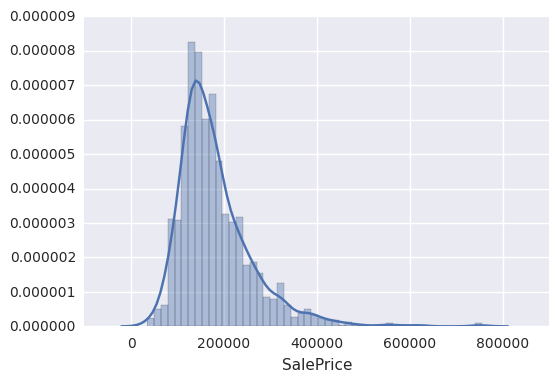

In [746]:
#histogram
sns.distplot(df_train['SalePrice']);

In [747]:
#skewness and kurtosis
print("Skewness: %f" % df_train['SalePrice'].skew())
print("Kurtosis: %f" % df_train['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


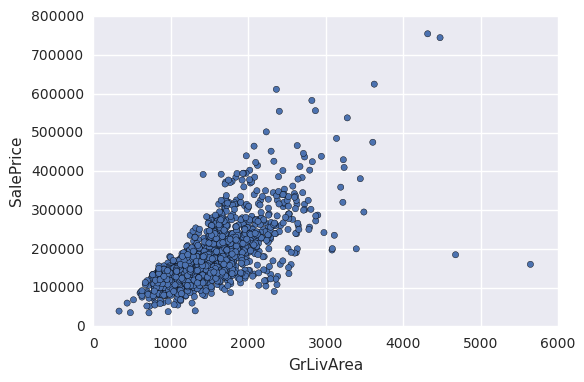

In [748]:
#scatter plot grlivarea/saleprice
var = 'GrLivArea'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

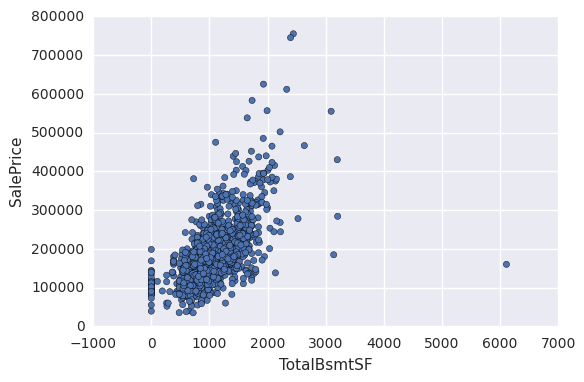

In [749]:
#scatter plot totalbsmtsf/saleprice
var = 'TotalBsmtSF'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

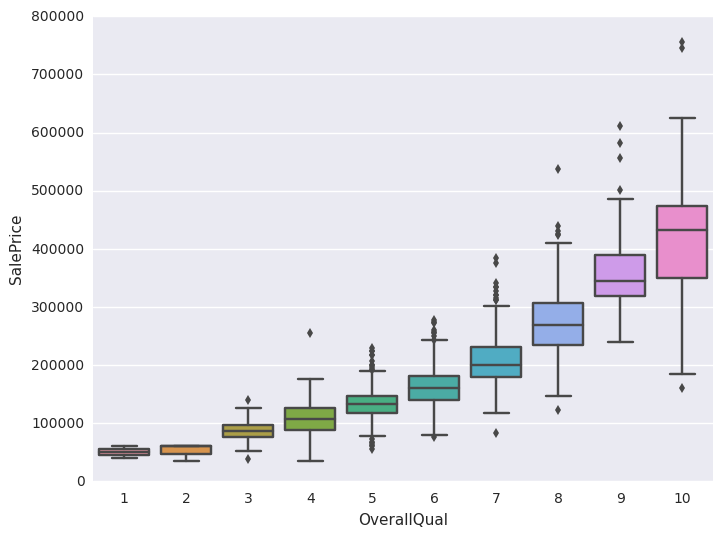

In [750]:
#box plot overallqual/saleprice
var = 'OverallQual'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

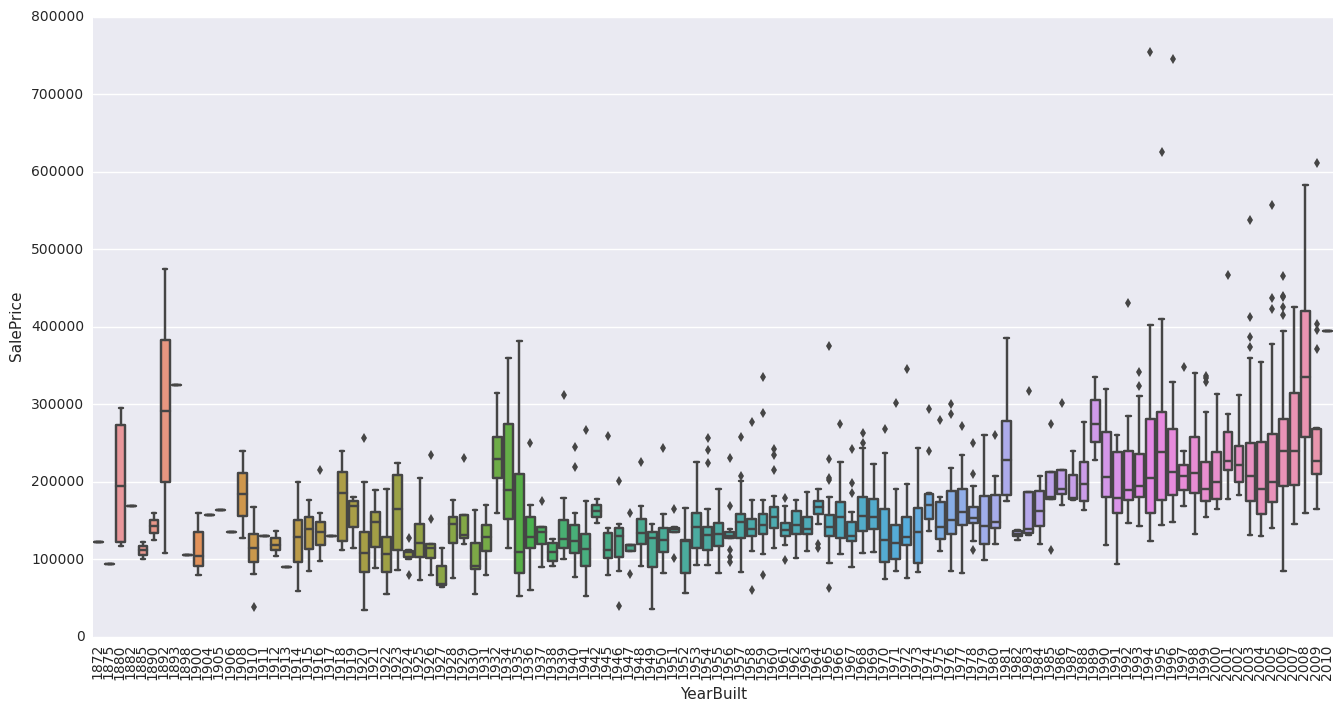

In [751]:
var = 'YearBuilt'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

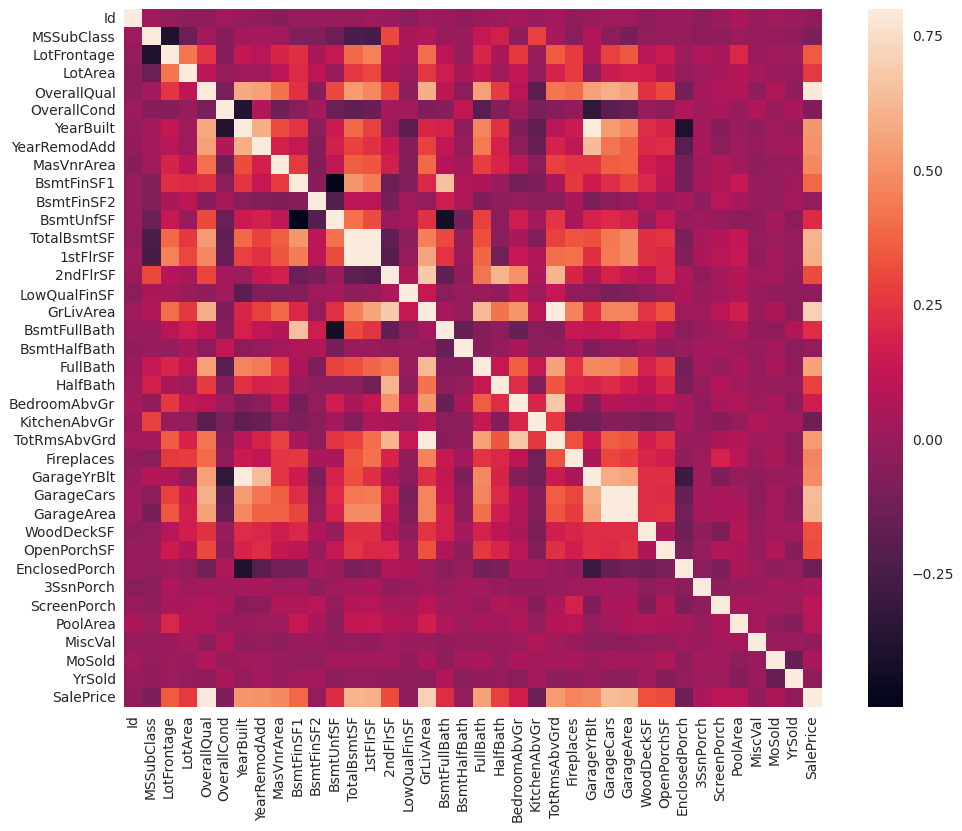

In [752]:
#correlation matrix
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

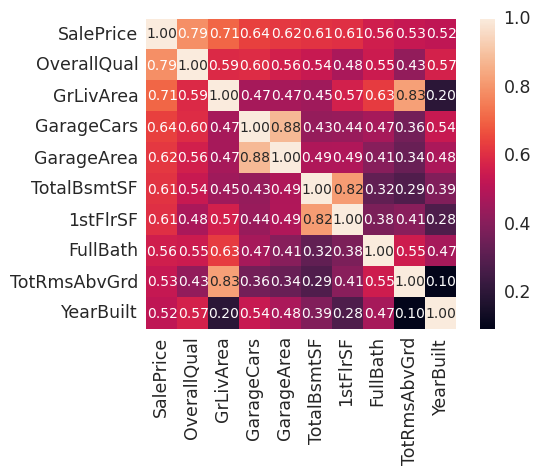

In [753]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

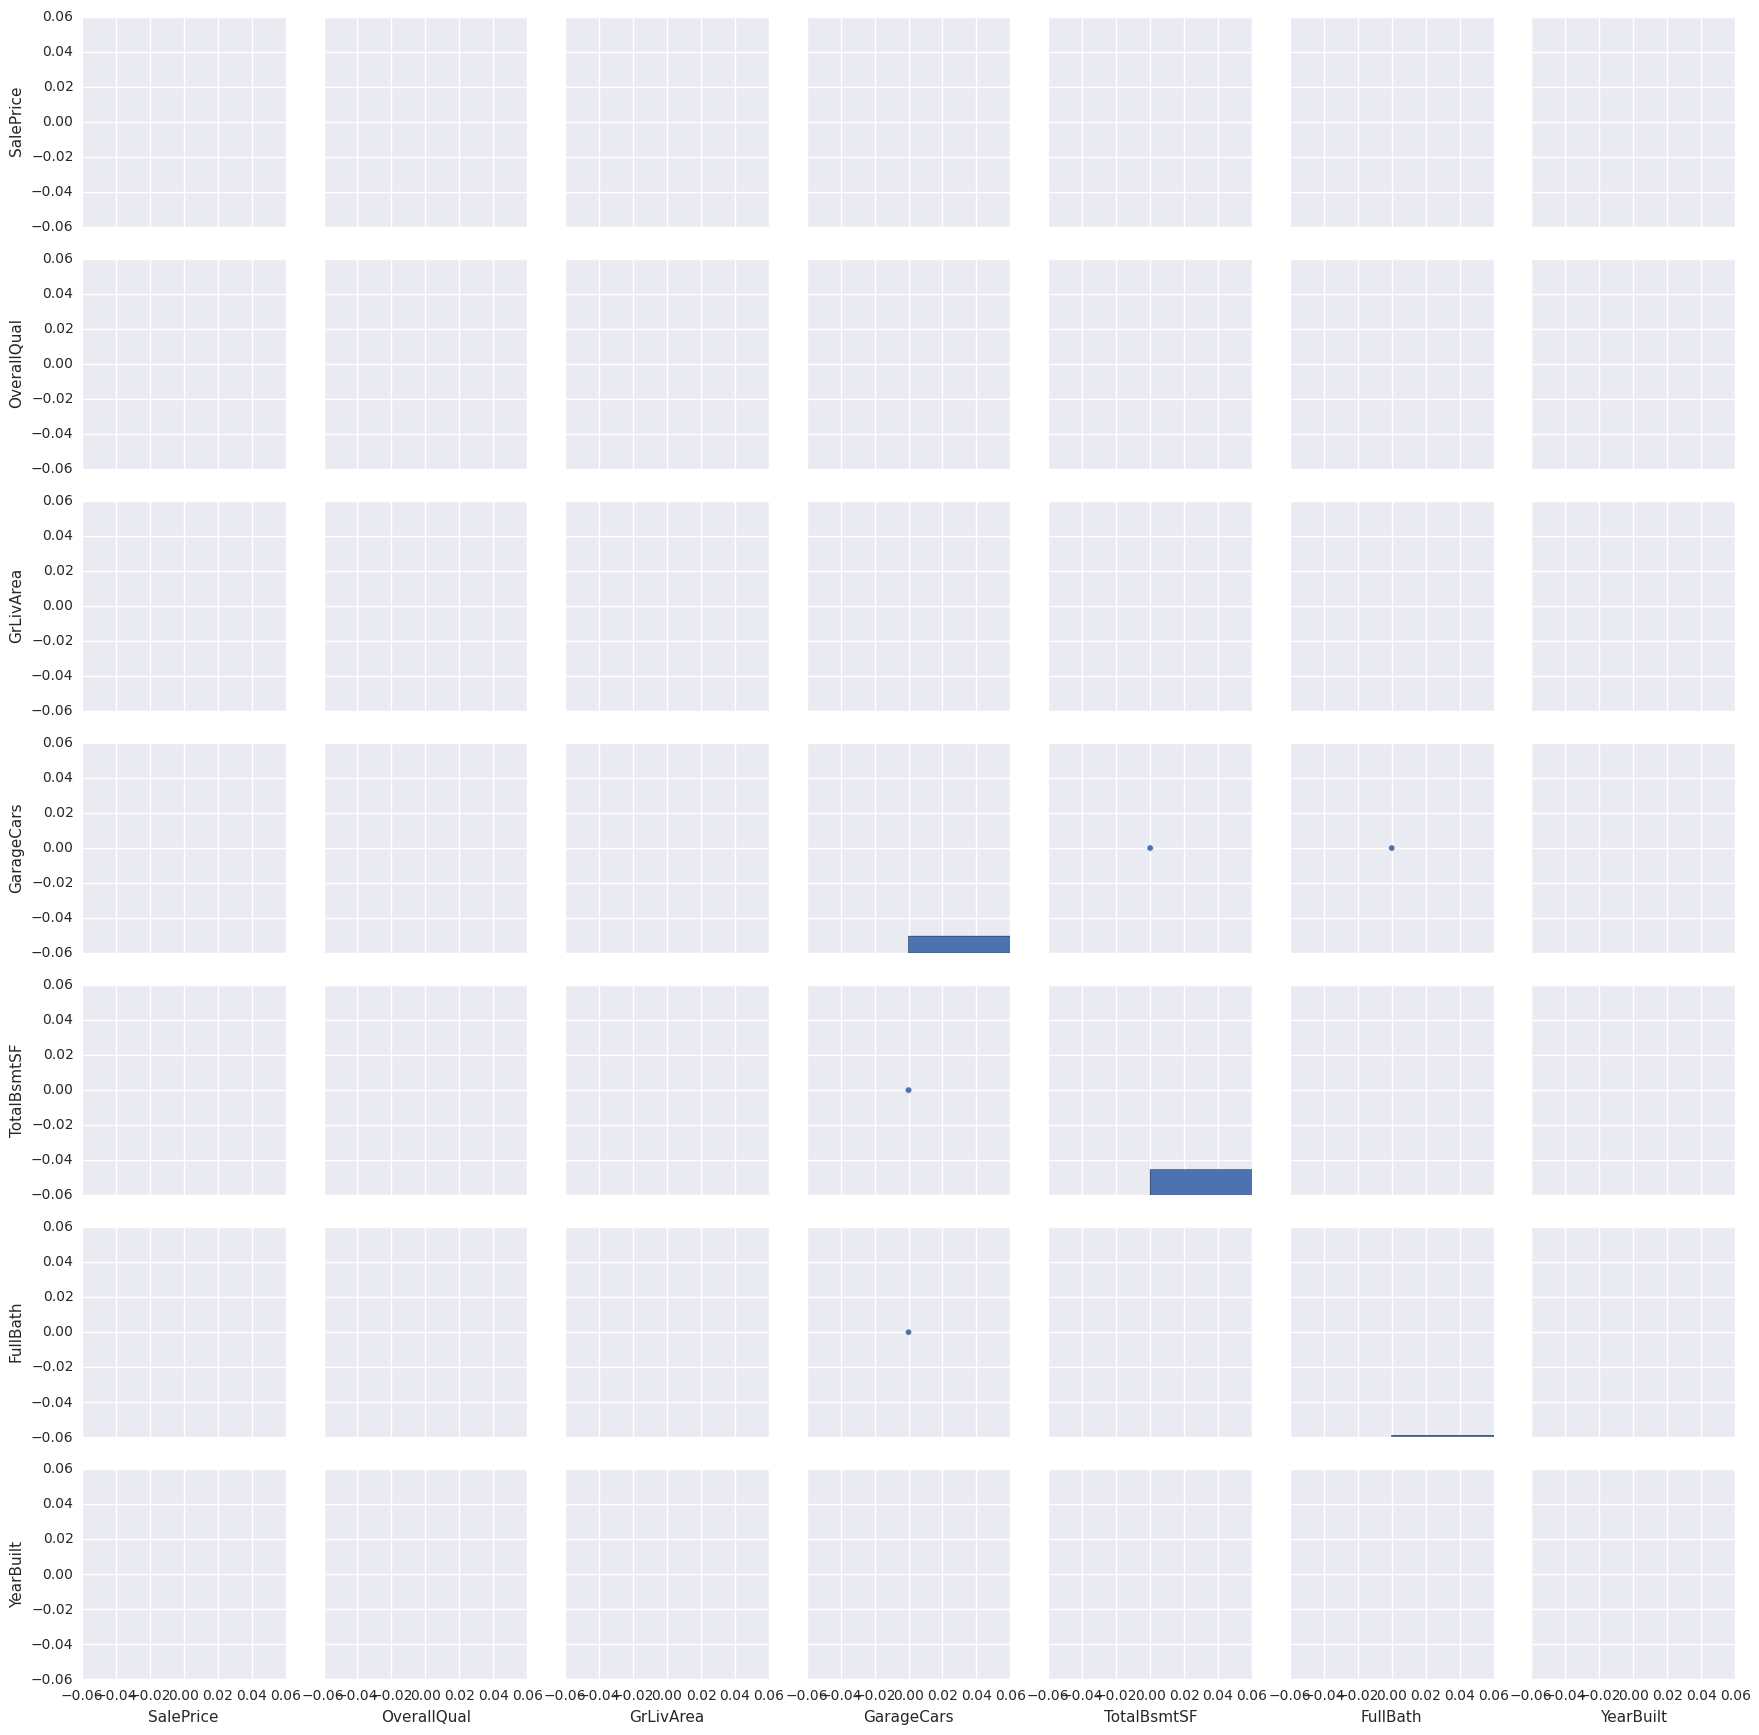

In [754]:
#scatterplot
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df_train[cols], size = 2.5)
plt.show();

In [755]:
#missing data
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


In [756]:
#dealing with missing data
df_train = df_train.drop((missing_data[missing_data['Total'] > 1]).index,1)
df_train = df_train.drop(df_train.loc[df_train['Electrical'].isnull()].index)
df_train.isnull().sum().max() #just checking that there's no missing data missing...

0

In [757]:
df_train.head(10)

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
5,6,50,RL,14115,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,320,0,0,700,10,2009,WD,Normal,143000
6,7,20,RL,10084,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,307000
7,8,60,RL,10382,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,228,0,0,0,350,11,2009,WD,Normal,200000
8,9,50,RM,6120,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,205,0,0,0,0,4,2008,WD,Abnorml,129900
9,10,190,RL,7420,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,1,2008,WD,Normal,118000


In [758]:
#missing data
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data_ = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data_

,Total,Percent
SalePrice,0,0.0
OverallQual,0,0.0
BsmtUnfSF,0,0.0
BsmtFinSF2,0,0.0
BsmtFinSF1,0,0.0
Foundation,0,0.0
ExterCond,0,0.0
ExterQual,0,0.0
Exterior2nd,0,0.0
Exterior1st,0,0.0


In [759]:
total_ = df_test.isnull().sum().sort_values(ascending=False)
percent_ = (df_test.isnull().sum()/df_test.isnull().count()).sort_values(ascending=False)
missing_data_ = pd.concat([total_, percent_], axis=1, keys=['Total_', 'Percent_'])
missing_data_.head(35)

,Total_,Percent_
PoolQC,1456,0.997944
MiscFeature,1408,0.965045
Alley,1352,0.926662
Fence,1169,0.801234
FireplaceQu,730,0.500343
LotFrontage,227,0.155586
GarageCond,78,0.053461
GarageQual,78,0.053461
GarageYrBlt,78,0.053461
GarageFinish,78,0.053461


In [760]:
df_test= df_test.drop((missing_data[missing_data['Total'] > 1]).index,1)
# submission (test data) must have the given number of rows; 
# instead of deleting points, fill in NaN values with median #
df_test['MSZoning'].fillna((df_test['MSZoning'].dropna().mode()[0]), inplace=True)
df_test['BsmtHalfBath'].fillna((df_test['BsmtHalfBath'].dropna().mode()[0]), inplace=True)
df_test['Utilities'].fillna((df_test['Utilities'].dropna().mode()[0]), inplace=True)
df_test['Functional'].fillna((df_test['Functional'].dropna().mode()[0]), inplace=True)
df_test['BsmtFullBath'].fillna((df_test['BsmtFullBath'].dropna().mode()[0]), inplace=True)
df_test['BsmtFinSF2'].fillna((df_test['BsmtFinSF2'].dropna().mode()[0]), inplace=True)
df_test['BsmtFinSF1'].fillna((df_test['BsmtFinSF1'].dropna().mode()[0]), inplace=True)
df_test['Exterior2nd'].fillna((df_test['Exterior2nd'].dropna().mode()[0]), inplace=True)
df_test['BsmtUnfSF'].fillna((df_test['BsmtUnfSF'].dropna().mode()[0]), inplace=True)
df_test['TotalBsmtSF'].fillna((df_test['TotalBsmtSF'].dropna().mode()[0]), inplace=True)
df_test['SaleType'].fillna((df_test['SaleType'].dropna().mode()[0]), inplace=True)
df_test['KitchenQual'].fillna((df_test['KitchenQual'].dropna().mode()[0]), inplace=True)
df_test['GarageArea'].fillna((df_test['GarageArea'].dropna().mode()[0]), inplace=True)
df_test['Exterior2nd'].fillna((df_test['Exterior2nd'].dropna().mode()[0]), inplace=True)
df_test['Exterior1st'].fillna((df_test['Exterior1st'].dropna().mode()[0]), inplace=True)
df_test['GarageCars'].fillna((df_test['GarageCars'].dropna().mode()[0]), inplace=True)

#df_test = df_test.drop(df_test.loc[df_test['MSZoning'].isnull()].index)
#df_test = df_test.drop(df_test.loc[df_test['BsmtHalfBath'].isnull()].index)
#df_test = df_test.drop(df_test.loc[df_test['Utilities'].isnull()].index)
#df_test = df_test.drop(df_test.loc[df_test['Functional'].isnull()].index)
#df_test = df_test.drop(df_test.loc[df_test['BsmtFullBath'].isnull()].index)
#df_test = df_test.drop(df_test.loc[df_test['BsmtFinSF2'].isnull()].index)
#df_test = df_test.drop(df_test.loc[df_test['BsmtFinSF1'].isnull()].index)
#df_test = df_test.drop(df_test.loc[df_test['Exterior2nd'].isnull()].index)
#df_test = df_test.drop(df_test.loc[df_test['BsmtUnfSF'].isnull()].index)
#df_test = df_test.drop(df_test.loc[df_test['TotalBsmtSF'].isnull()].index)
#df_test = df_test.drop(df_test.loc[df_test['SaleType'].isnull()].index)
#df_test = df_test.drop(df_test.loc[df_test['KitchenQual'].isnull()].index)
#df_test = df_test.drop(df_test.loc[df_test['GarageArea'].isnull()].index)
#df_test = df_test.drop(df_test.loc[df_test['Exterior2nd'].isnull()].index)
#df_test = df_test.drop(df_test.loc[df_test['Exterior1st'].isnull()].index)
#df_test = df_test.drop(df_test.loc[df_test['GarageCars'].isnull()].index)


df_test.isnull().sum().max() #just checking that there's no missing data missing...
# why there's something missing? :/ #

0

In [761]:
#missing data
total = df_test.isnull().sum().sort_values(ascending=False)
percent = (df_test.isnull().sum()/df_test.isnull().count()).sort_values(ascending=False)
missing_data_ = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data_

,Total,Percent
SaleCondition,0,0.0
OverallQual,0,0.0
BsmtUnfSF,0,0.0
BsmtFinSF2,0,0.0
BsmtFinSF1,0,0.0
Foundation,0,0.0
ExterCond,0,0.0
ExterQual,0,0.0
Exterior2nd,0,0.0
Exterior1st,0,0.0


In [762]:
#standardizing data
saleprice_scaled = StandardScaler().fit_transform(df_train['SalePrice'][:,np.newaxis]);
low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]
high_range= saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

outer range (low) of the distribution:
[[-1.83820775]
 [-1.83303414]
 [-1.80044422]
 [-1.78282123]
 [-1.77400974]
 [-1.62295562]
 [-1.6166617 ]
 [-1.58519209]
 [-1.58519209]
 [-1.57269236]]

outer range (high) of the distribution:
[[ 3.82758058]
 [ 4.0395221 ]
 [ 4.49473628]
 [ 4.70872962]
 [ 4.728631  ]
 [ 5.06034585]
 [ 5.42191907]
 [ 5.58987866]
 [ 7.10041987]
 [ 7.22629831]]


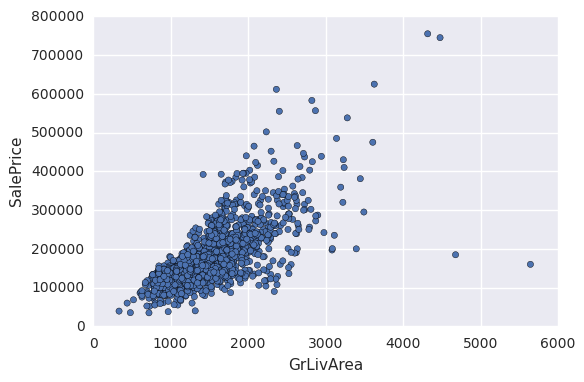

In [763]:
#bivariate analysis saleprice/grlivarea
var = 'GrLivArea'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

In [764]:
#deleting points
df_train.sort_values(by = 'GrLivArea', ascending = False)[:2]
df_train = df_train.drop(df_train[df_train['Id'] == 1299].index)
df_train = df_train.drop(df_train[df_train['Id'] == 524].index)

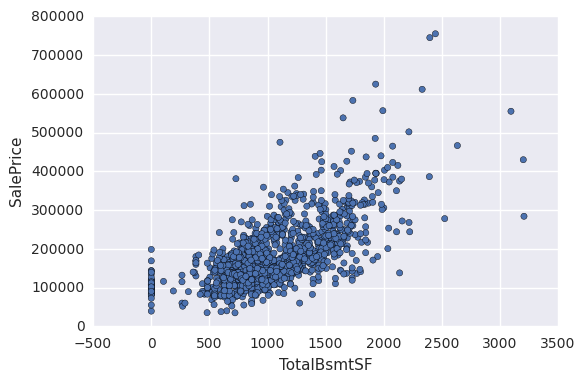

In [765]:
#bivariate analysis saleprice/grlivarea
var = 'TotalBsmtSF'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

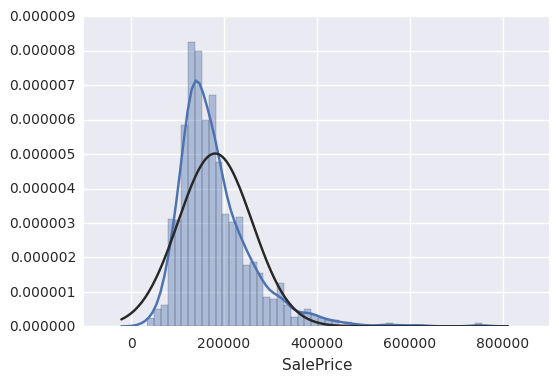

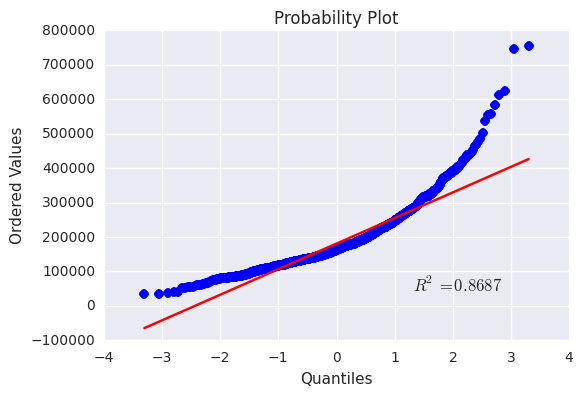

In [766]:
#histogram and normal probability plot
sns.distplot(df_train['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)

In [767]:
#applying log transformation
df_train['SalePrice'] = np.log(df_train['SalePrice'])

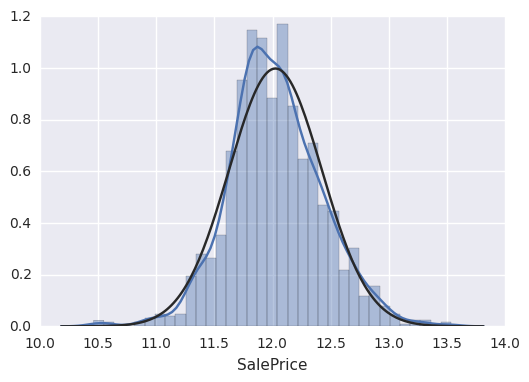

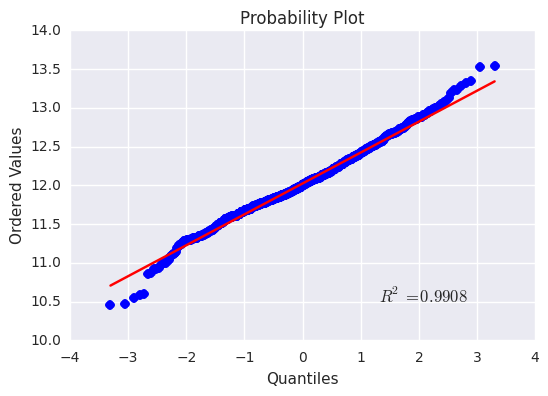

In [768]:
#transformed histogram and normal probability plot
sns.distplot(df_train['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)

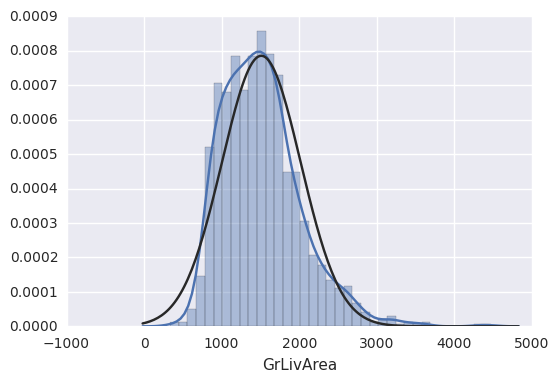

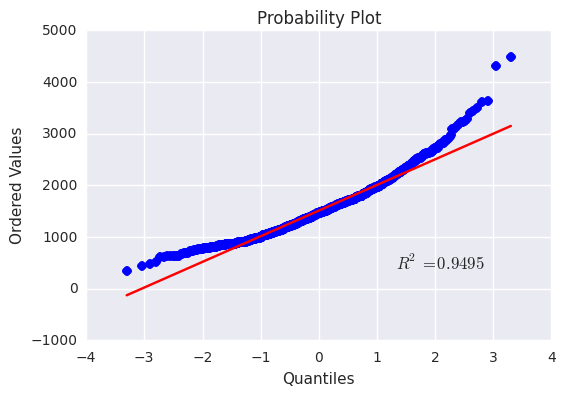

In [769]:
#histogram and normal probability plot
sns.distplot(df_train['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['GrLivArea'], plot=plt)

In [770]:
#data transformation
df_train['GrLivArea'] = np.log(df_train['GrLivArea'])
df_test['GrLivArea'] = np.log(df_test['GrLivArea'])

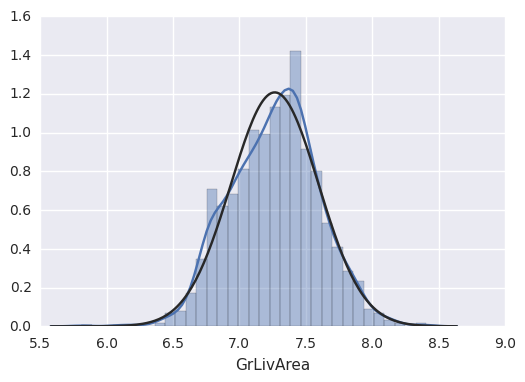

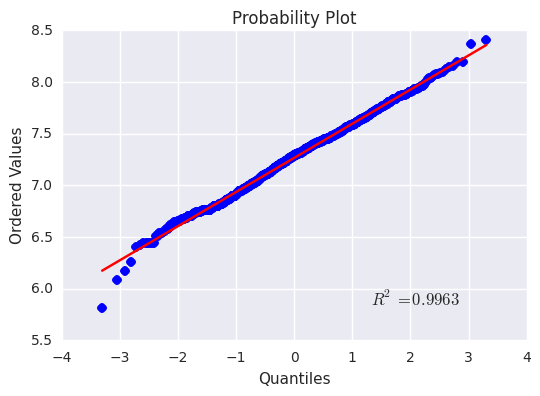

In [771]:
#transformed histogram and normal probability plot
sns.distplot(df_train['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['GrLivArea'], plot=plt)

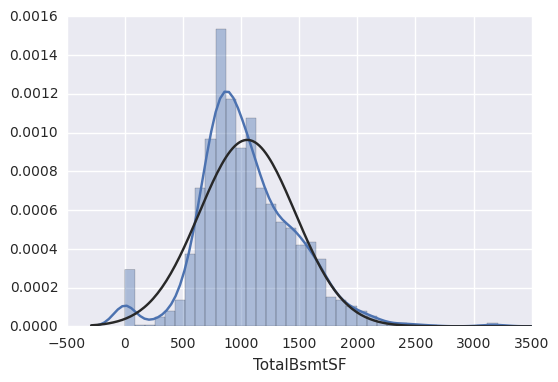

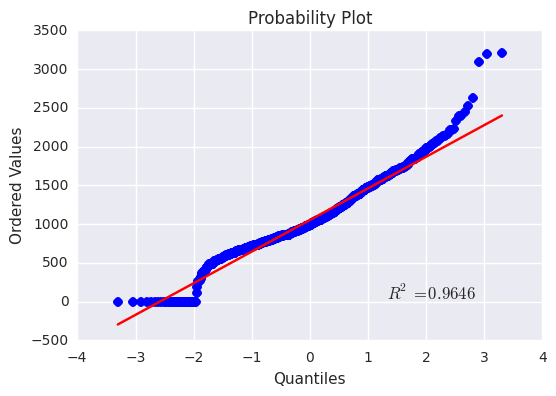

In [772]:
#histogram and normal probability plot
sns.distplot(df_train['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['TotalBsmtSF'], plot=plt)

In [773]:
#histogram and normal probability plot
#sns.distplot(df_test['TotalBsmtSF'], fit=norm);
#fig = plt.figure()
#res = stats.probplot(df_test['TotalBsmtSF'], plot=plt)

In [774]:
#create column for new variable (one is enough because it's a binary categorical feature)
#if area>0 it gets 1, for area==0 it gets 0
df_train['HasBsmt'] = pd.Series(len(df_train['TotalBsmtSF']), index=df_train.index)
df_train['HasBsmt'] = 0 
df_train.loc[df_train['TotalBsmtSF']>0,'HasBsmt'] = 1

In [775]:
df_test['HasBsmt'] = pd.Series(len(df_test['TotalBsmtSF']), index=df_test.index)
df_test['HasBsmt'] = 0 
df_test.loc[df_test['TotalBsmtSF']>0,'HasBsmt'] = 1

In [776]:
#transform data
df_train.loc[df_train['HasBsmt']==1,'TotalBsmtSF'] = np.log(df_train['TotalBsmtSF'])


In [777]:
#transform data
df_test.loc[df_test['HasBsmt']==1,'TotalBsmtSF'] = np.log(df_test['TotalBsmtSF'])


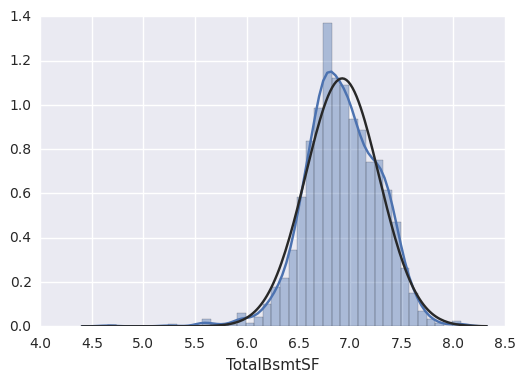

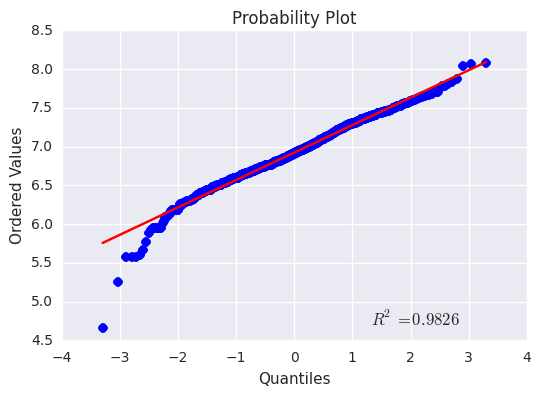

In [778]:
#histogram and normal probability plot
sns.distplot(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'], plot=plt)

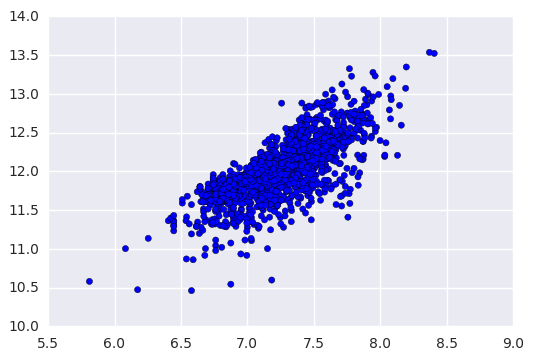

In [779]:
#scatter plot
plt.scatter(df_train['GrLivArea'], df_train['SalePrice']);

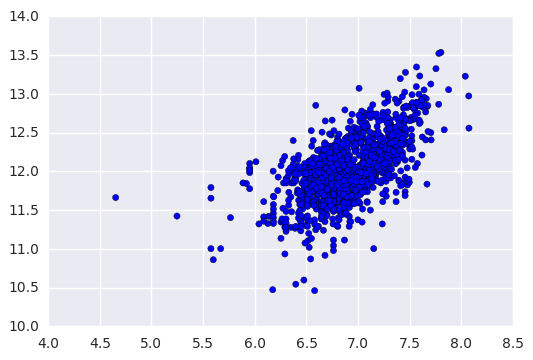

In [780]:
#scatter plot
plt.scatter(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'], df_train[df_train['TotalBsmtSF']>0]['SalePrice']);

In [781]:
#train = pd.DataFrame(data = [['a', 123, 'ab'], ['b', 234, 'bc']],
#                     columns=['col1', 'col2', 'col3'])
#test = pd.DataFrame(data = [['c', 345, 'ab'], ['b', 456, 'ab']],
#                     columns=['col1', 'col2', 'col3'])
X_train = df_train.drop(['SalePrice','Id'],axis=1)
Y_train = df_train['SalePrice']

X_test = df_test.drop('Id',axis=1)

train_objs_num = len(X_train)
dataset = pd.concat(objs=[X_train, X_test], axis=0)
dataset_preprocessed = pd.get_dummies(dataset)
X_train = dataset_preprocessed[:train_objs_num]
X_test = dataset_preprocessed[train_objs_num:]

In [782]:
X_train.head(10)

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,8450,7,5,2003,2003,706.0,0.0,150.0,6.752270,...,0,0,0,1,0,0,0,0,1,0
1,20,9600,6,8,1976,1976,978.0,0.0,284.0,7.140453,...,0,0,0,1,0,0,0,0,1,0
2,60,11250,7,5,2001,2002,486.0,0.0,434.0,6.824374,...,0,0,0,1,0,0,0,0,1,0
3,70,9550,7,5,1915,1970,216.0,0.0,540.0,6.628041,...,0,0,0,1,1,0,0,0,0,0
4,60,14260,8,5,2000,2000,655.0,0.0,490.0,7.043160,...,0,0,0,1,0,0,0,0,1,0
5,50,14115,5,5,1993,1995,732.0,0.0,64.0,6.679599,...,0,0,0,1,0,0,0,0,1,0
6,20,10084,8,5,2004,2005,1369.0,0.0,317.0,7.430114,...,0,0,0,1,0,0,0,0,1,0
7,60,10382,7,6,1973,1973,859.0,32.0,216.0,7.009409,...,0,0,0,1,0,0,0,0,1,0
8,50,6120,7,5,1931,1950,0.0,0.0,952.0,6.858565,...,0,0,0,1,1,0,0,0,0,0
9,190,7420,5,6,1939,1950,851.0,0.0,140.0,6.898715,...,0,0,0,1,0,0,0,0,1,0


In [783]:
X_test.head(10)

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,20,11622,5,6,1961,1961,468.0,144.0,270.0,6.782192,...,0,0,0,1,0,0,0,0,1,0
1,20,14267,6,6,1958,1958,923.0,0.0,406.0,7.192182,...,0,0,0,1,0,0,0,0,1,0
2,60,13830,5,5,1997,1998,791.0,0.0,137.0,6.833032,...,0,0,0,1,0,0,0,0,1,0
3,60,9978,6,6,1998,1998,602.0,0.0,324.0,6.830874,...,0,0,0,1,0,0,0,0,1,0
4,120,5005,8,5,1992,1992,263.0,0.0,1017.0,7.154615,...,0,0,0,1,0,0,0,0,1,0
5,60,10000,6,5,1993,1994,0.0,0.0,763.0,6.637258,...,0,0,0,1,0,0,0,0,1,0
6,20,7980,6,7,1992,2007,935.0,0.0,233.0,7.063048,...,0,0,0,1,0,0,0,0,1,0
7,60,8402,6,5,1998,1998,0.0,0.0,789.0,6.670766,...,0,0,0,1,0,0,0,0,1,0
8,20,10176,7,5,1990,1990,637.0,0.0,663.0,7.170120,...,0,0,0,1,0,0,0,0,1,0
9,20,8400,4,5,1970,1970,804.0,78.0,0.0,6.782192,...,0,0,0,1,0,0,0,0,1,0


In [784]:
X_train.isnull().sum().sum()

0

In [785]:
#from sklearn.decomposition import PCA
#pca = PCA(n_components=15,svd_solver='full')
#pca.fit(X_train,Y_train)
#pca.n_components_

In [786]:
#X_train = pca.transform(X_train)
#X_test = pca.transform(X_test)
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train,Y_train)
Y_pred = linreg.predict(X_test)
Y_pred = np.exp(Y_pred)
print linreg.score(X_train,Y_train)

0.945535748546


In [787]:
submission = pd.DataFrame({"Id":df_test['Id'],"SalePrice":Y_pred})
submission.to_csv("submission.csv",index=False)